#Rastreamento de objetos unicos 


import cv2

# Carregar o vídeo
video_path = 'D:/Dados/Material_complementar_rastreamento_objetos/videos/race.mp4'
cap = cv2.VideoCapture(video_path)

# Inicializar o rastreador
tracker = cv2.TrackerCSRT_create()

# Ler o primeiro frame do vídeo
ret, frame = cap.read()
if not ret:
    print("Erro ao ler o vídeo")
    exit()

# Selecionar a região de interesse (ROI) para rastrear
bbox = cv2.selectROI("Selecione o objeto a ser rastreado", frame, False)
tracker.init(frame, bbox)

while True:
    # Ler o próximo frame do vídeo
    ret, frame = cap.read()
    if not ret:
        break
    
    # Atualizar o rastreador com o novo frame
    success, bbox = tracker.update(frame)
    
    # Desenhar a região rastreada no frame
    if success:
        x, y, w, h = [int(v) for v in bbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    else:
        cv2.putText(frame, "Perda de rastreamento", (100, 80), cv2.FONT_HERSHEY_SIMPLEX, 0.75, (0, 0, 255), 2)
    
    # Exibir o frame com a região rastreada
    cv2.imshow("Rastreamento de objeto", frame)
    
    # Verificar se o usuário pressionou a tecla 'q' para sair do loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar o objeto de captura e fechar todas as janelas
cap.release()
cv2.destroyAllWindows()


#Test

#Rastreamento de objetos unicos 

# Importando bibliotecas
import cv2
import sys
from random import randint

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

# Declarando os tipos de algoritmos de rastreamento
tracker_types = ['BOOSTING', 'MIL', 'KCF', 'TLD', 'MEDIANFLOW', 'MOSSE', 'CSRT']
# Escolhendo o algoritmo 0: BOOSTING, 1: MIL, 2: KCF, 3: TLD, 4: MEDIANFLOW, 5: MOSSE, 6: CSRT
tracker_type = tracker_types[2] # Indique o classificador
print(tracker_type)

if int(minor_ver) < 3:
    tracker = tracker_type
else:
# Verificando qual o algoritmo escolhido
   if tracker_type == 'BOOSTING':
       tracker = cv2.legacy.TrackerBoosting_create()
   if tracker_type == 'MIL':
       tracker = cv2.legacy.TrackerMIL_create()
   if tracker_type == 'KCF':
       tracker = cv2.legacy.TrackerKCF_create()
   if tracker_type == 'TLD':
       tracker = cv2.legacy.TrackerTLD_create()
   if tracker_type == 'MEDIANFLOW':
       tracker = cv2.legacy.TrackerMedianFlow_create()
   if tracker_type == 'MOSSE':
       tracker = cv2.legacy.TrackerMOSSE_create()
   if tracker_type == 'CSRT':
       tracker = cv2.legacy.TrackerCSRT_create()

video_path = 'D:/Dados/Material_complementar_rastreamento_objetos/videos/race.mp4'

video = cv2.VideoCapture(video_path) # Localize o caminho do vídeo para análise, na pasta videos.
if not video.isOpened():
    print('Não foi possível carregar o vídeo')
    sys.exit()

ok, frame = video.read() # Habilita a leitura do vídeo
if not ok:
    print('Não foi possível ler o arquivo de vídeo')
    sys.exit()

bbox = cv2.selectROI(frame, False) # Cria o retângulo no objeto de interesse.

ok = tracker.init(frame, bbox) # Habilita o rastreamento do objeto.

colors = (randint(0, 255), randint(0, 255), randint(0, 255)) # Seleciona uma cor aleatória para o retângulo.

# Comandos para rastrear o objeto enquando vídeo estiver ativo.
while True:
    ok, frame = video.read()
    if not ok:
        break

    timer = cv2.getTickCount()
    ok, bbox = tracker.update(frame)

    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)

    if ok:
        (x, y, w, h) = [int(v) for v in bbox]
        cv2.rectangle(frame, (x, y), (x + w, y + h), colors, 2, 1)
    else:
        cv2.putText(frame, 'Falha no rastreamento', (100, 80),
                    cv2.FONT_HERSHEY_SIMPLEX, .75, (0, 0, 255), 2)

    cv2.putText(frame, tracker_type + ' Tracker', (100, 20),
                cv2.FONT_HERSHEY_SIMPLEX, .75, (0, 0, 255), 2)

    cv2.putText(frame, 'FPS: ' + str(int(fps)), (100, 50),
                cv2.FONT_HERSHEY_SIMPLEX, .75, (0, 0, 255), 2)

    cv2.imshow('Tracking', frame)
    if cv2.waitKey(1) & 0XFF == 27:
        break

In [ ]:
#Exercicio  70
#Implemente um algoritmo, em Python, de Aprendizado de Máquina para
#construir um algoritmo de rastreamento de objetos pela webcam.



# Importando bibliotecas
import cv2
import numpy as np

# Inicializa a captura pela webcam
cap = cv2.VideoCapture(0)

# Leitura do primeiro frame e transformação em esacala de cinza.
ret, frame = cap.read()
frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Utilização do método de estimativa de fluxo óptico
parameters_lucas_kanade = dict(winSize=(15, 15),
                               maxLevel=4,
                               criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# Define uma função para selecionar um ponto de interesse no frame com um clique do mouse
def select_point(event, x, y, flags, params):
    global point, selected_point, old_points
    if event == cv2.EVENT_LBUTTONDOWN:
        point = (x, y)
        selected_point = True # Indica que um ponto foi selecionado
        old_points = np.array([[x, y]], dtype=np.float32) # Armazena o ponto como array NumPy
# Cria uma janela chamada 'Frame' e define a função 'select_point' como callback para eventos do mouse
cv2.namedWindow('Frame')
cv2.namedWindow('Frame')
cv2.setMouseCallback('Frame', select_point)

# Inicializa variáveis para controle do ponto selecionado
selected_point = False
point = ()
old_points = np.array([[]])

# Cria uma máscara com as mesmas dimensões e tipo do frame para desenhar o rastreamento
mask = np.zeros_like(frame)

# Loop principal para processamento de cada frame capturado pela webcam
while True:
    ret, frame = cap.read() # Lê o próximo frame
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Converte o frame atual para escala de cinza
    # Se um ponto foi selecionado
    if selected_point is True:
        cv2.circle(frame, point, 5, (0, 0, 255), 2) # Desenha um círculo no frame no ponto selecionado
        # Calcula o fluxo óptico de Lucas-Kanade para o frame atual
        new_points, status, errors = cv2.calcOpticalFlowPyrLK(frame_gray_init,
                                                              frame_gray,
                                                              old_points,
                                                              None,
                                                              **parameters_lucas_kanade)
        # Atualiza o frame inicial para o frame atual
        frame_gray_init = frame_gray.copy()
        old_points = new_points # Atualiza os pontos antigos para os novos pontos calculados
        # Extrai as coordenadas dos pontos
        x, y = new_points.ravel().astype(int)
        j, k = old_points.ravel().astype(int)

        mask = cv2.line(mask, (x, y), (j, k), (0, 255, 255), 2) # Desenho de uma linha indicando o rastreamento;
        frame = cv2.circle(frame, (x, y), 5, (0, 255, 0), -1) # Demarcação de um ponto do objeto de rastreamento;
    # Combina o frame e a máscara
    img = cv2.add(frame, mask)
    # Exibe o frame e a máscara em janelas separadas
    cv2.imshow("Frame", frame)
    cv2.imshow("Frame 2", mask)
    # Aguarda por uma tecla ser pressionada; se a tecla ESC for pressionada, interrompe o loop
    key = cv2.waitKey(1)
    if key == 27:
        break
# Libera a captura de vídeo e fecha todas as janelas
cap.release()
cv2.destroyAllWindows()

In [ ]:
#Implemente um algoritmo, em Python, de Aprendizado de Máquina para
#construir um algoritmo de rastreamento de objetos pela webcam.

import cv2

# Função para selecionar o objeto a ser rastreado
def selecionar_objeto(frame):
    bbox = cv2.selectROI("Selecione o objeto", frame, False)
    return bbox

# Captura de vídeo da webcam
cap = cv2.VideoCapture(0)

# Verifica se a webcam está funcionando corretamente
if not cap.isOpened():
    print("Erro ao abrir a webcam")
    exit()

# Leitura do primeiro frame
ret, frame = cap.read()

# Seleciona o objeto a ser rastreado
bbox = selecionar_objeto(frame)

# Inicializa o rastreador KCF
tracker = cv2.TrackerKCF_create()

# Inicializa o rastreamento
ok = tracker.init(frame, bbox)

while True:
    # Captura um novo frame
    ret, frame = cap.read()

    if not ret:
        break

    # Atualiza o rastreamento
    ok, bbox = tracker.update(frame)

    # Desenha a caixa delimitadora do objeto rastreado
    if ok:
        p1 = (int(bbox[0]), int(bbox[1]))
        p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
        cv2.rectangle(frame, p1, p2, (0, 255, 0), 2)
    else:
        cv2.putText(frame, "Erro de rastreamento", (100,80), cv2.FONT_HERSHEY_SIMPLEX, 0.75,(0,0,255),2)

    # Mostra o frame com a caixa delimitadora
    cv2.imshow("Rastreamento de objetos", frame)

    # Sai do loop se a tecla 'q' for pressionada
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Libera os recursos
cap.release()
cv2.destroyAllWindows()


In [1]:
#Exercicio  71 
#Implemente um algoritmo, em Python, de Aprendizado de Máquina para
#rastreamento de objeto, com análise do movimento em um vídeo, aplicando o
#conceito de fluxo óptico esparso.



# Importando bibliotecas
import cv2
import numpy as np

# Carrega um vídeo para análise do arquivo especificado
video_path = "D:/Dados/Material_complementar_rastreamento_objetos/videos/walking.avi"
cap = cv2.VideoCapture(video_path)

# Configura os parâmetros para o detector de cantos Shi-Tomasi
parameters_shitomasi = dict(maxCorners=100,
                            qualityLevel=0.3,
                            minDistance=7)
# Configura os parâmetros para o algoritmo de Lucas-Kanade para o fluxo óptico
parameters_lucas_kanade = dict(winSize=(15, 15),
                               maxLevel=2,
                               criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
# Gera cores aleatórias para representar os pontos de interesse
colors = np.random.randint(0, 255, (100, 3))

# Lê o primeiro frame do vídeo
ret, frame = cap.read()

# Converte o primeiro frame para escala de cinza
frame_gray_init = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detecta os pontos de interesse no primeiro frame usando o detector de cantos Shi-Tomasi
edges = cv2.goodFeaturesToTrack(frame_gray_init, mask=None, **parameters_shitomasi)

# Cria uma máscara com as mesmas dimensões e tipo do frame para desenhar o trajeto dos pontos
mask = np.zeros_like(frame)

# Loop para processar cada frame do vídeo
while True:
    ret, frame = cap.read() # Lê o frame atual do vídeo
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) # Converte o frame atual para escala de cinza
    # Calcula o fluxo óptico de Lucas-Kanade para os pontos de interesse detectados anteriormente
    new_edges, status, errors = cv2.calcOpticalFlowPyrLK(frame_gray_init,
                                                         frame_gray,
                                                         edges,
                                                         None,
                                                         **parameters_lucas_kanade)
    # Filtra os novos pontos de interesse com base no status
    news = new_edges[status == 1]
    olds = edges[status == 1]

    # Itera sobre os pontos antigos e novos para atualizar o trajeto
    for i, (new, old) in enumerate(zip(news, olds)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)

        # Desenha uma linha na máscara para indicar o trajeto do ponto
        mask = cv2.line(mask, (a, b), (c, d), colors[i].tolist(), 2)
        # Desenha um círculo no frame para marcar o ponto de interesse
        frame = cv2.circle(frame, (a, b), 5, colors[i].tolist(), -1)

    img = cv2.add(frame, mask) # Combina o frame e a máscara

    # Exibe o resultado do fluxo óptico esparsa em uma janela
    cv2.imshow('Sparce Optical flow', img)
    if cv2.waitKey(1) == 13:     # Aguarda por uma tecla ser pressionada; se a tecla 'Enter' for pressionada, interrompe o loop
        break

    # Atualiza o frame inicial para o frame atual para a próxima iteração
    frame_gray_init = frame_gray.copy()
    # Atualiza os pontos de interesse para os novos pontos
    edges = news.reshape(-1, 1, 2)

# Fecha todas as janelas abertas e libera a captura de vídeo
cv2.destroyAllWindows()
cap.release()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


: 

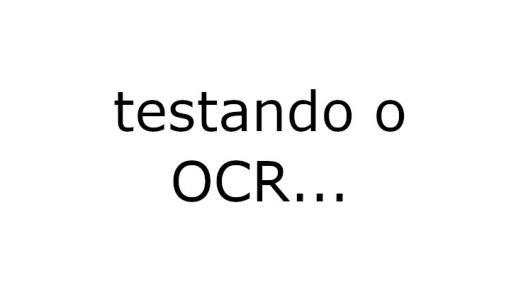

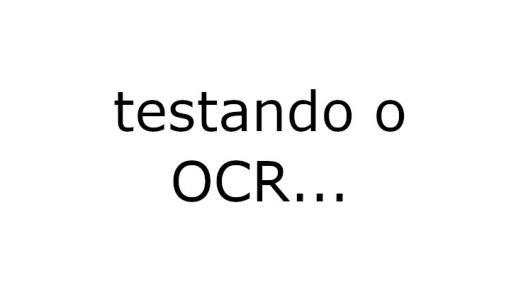

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [3]:

# Exerciocio 72 
# Extrator de Textos 


# Realize o import das bibliotecas
import pytesseract
import numpy as np
import cv2 # OpenCV
#from google.colab.patches import cv2_imshow
import zipfile
import matplotlib.pyplot as plt

# Conectando o Colab ao Google Drive
#rom google.colab import drive
#drive.mount('/content/gdrive')

# Realize o dowload da pasta Material_complementar_reconhecimento_texto.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
#path = "/content/gdrive/MyDrive/Material_complementar_reconhecimento_texto.zip"
#zip_object = zipfile.ZipFile(file=path, mode="r")
#zip_object.extractall("./")

# Carregue a imagem teste01.jpg da pasta compartilhada no Google Sala de Aula para dentro do Colab, aba Arquivos.
img = cv2.imread('D:/Dados/Material_complementar_reconhecimento_texto/imagens/teste01.jpg')
#cv2_imshow(img) # BGR (RGB)
plt.imshow(img)
plt.axis('off')  # Desativar eixos para uma visualização mais limpa
plt.show()

# Transforme a imagem do padrão BGR para RGB
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2_imshow(rgb)
plt.imshow(img)
plt.axis('off')  # Desativar eixos para uma visualização mais limpa
plt.show()

# Da imagem, a função irá extrair os caracteres encontrados.
texto = pytesseract.image_to_string(rgb)
print(texto)